In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statistics as st
import math
import sklearn
import warnings

# Load data

In [247]:
data = pd.read_csv('D:\Anshuman file\Study Meterial\Data\CAR DETAILS.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#### Checking Data Types

In [248]:
data.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

#### Checking Data Shape

In [249]:
data.shape

(4340, 8)

#### Checking Data Describe

In [250]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


#### Checking Null Values

In [252]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

#### Checking Duplicates

In [253]:
data.duplicated().sum()

763

#### Handling Duplicates

In [254]:
data.drop_duplicates(inplace=True)

In [255]:
data.shape

(3577, 8)

In [310]:
year = data['year'].value_counts()
year.head()

2017    346
2012    338
2015    332
2014    321
2013    298
Name: year, dtype: int64

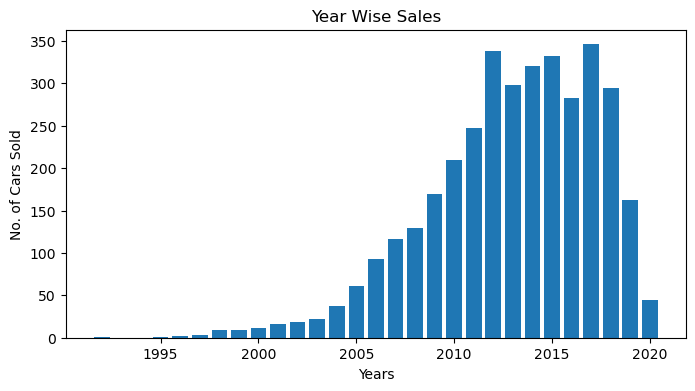

In [257]:
plt.figure(figsize=(8,4))
plt.bar(year.index,year)
plt.title('Year Wise Sales')
plt.xlabel('Years')
plt.ylabel('No. of Cars Sold')
plt.show()

In [258]:
fule = data['fuel'].value_counts()
fule

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

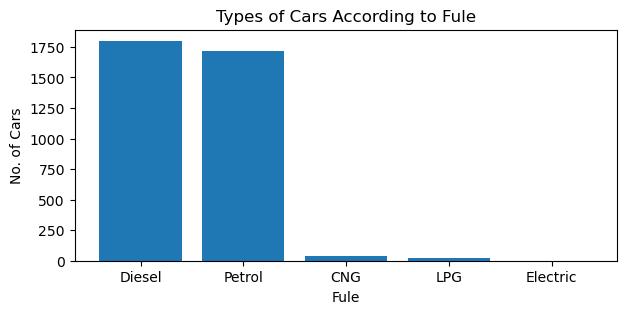

In [311]:
plt.figure(figsize=(7,3))
plt.bar(fule.index,fule)
plt.title('Types of Cars According to Fule')
plt.xlabel('Fule')
plt.ylabel('No. of Cars')
plt.show()

In [260]:
st = data['seller_type'].value_counts()
st

Individual          2832
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64

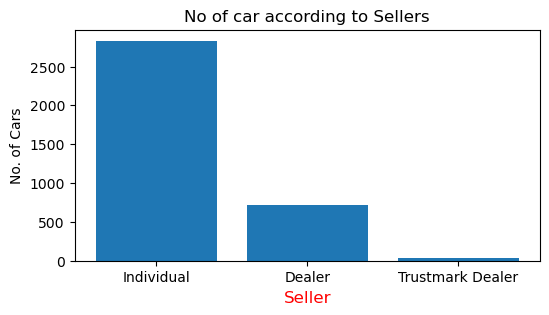

In [312]:
plt.figure(figsize=(6,3))
plt.bar(st.index,st)
plt.title('No of car according to Sellers')
plt.xlabel('Seller',color= 'r', size =12)
plt.ylabel('No. of Cars')
plt.show()

In [262]:
trans = data['transmission'].value_counts()
trans

Manual       3265
Automatic     312
Name: transmission, dtype: int64

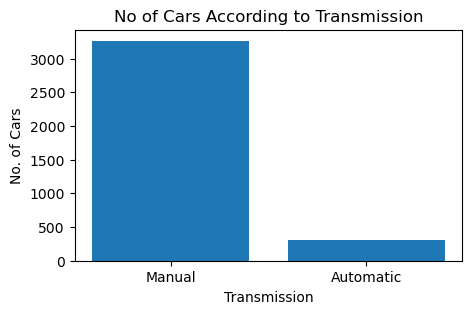

In [263]:
plt.figure(figsize=(5,3))
plt.bar(trans.index,trans)
plt.title('No of Cars According to Transmission')
plt.xlabel('Transmission')
plt.ylabel('No. of Cars')
plt.show()

In [264]:
d=data.corr()
d

C:\Users\rudra\AppData\Local\Temp\ipykernel_146244\3864468083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d=data.corr()


,year,selling_price,km_driven
year,1.00000,0.424260,-0.417490
selling_price,0.42426,1.000000,-0.187359
km_driven,-0.41749,-0.187359,1.000000


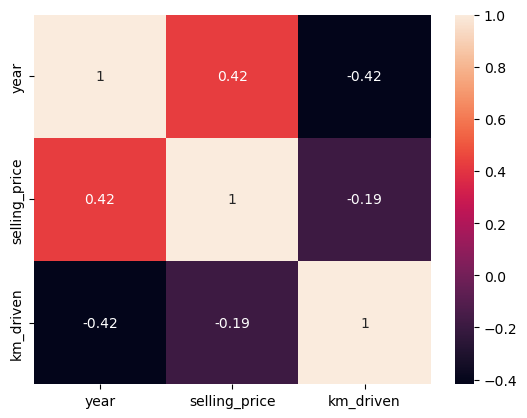

In [316]:
hm = sns.heatmap(data=d,annot = True)
plt.show()

## Preparing The Model Part

In [266]:
df = data.copy()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [267]:
df = df.drop(['seller_type','name'], axis = 1)
df.head()

,year,selling_price,km_driven,fuel,transmission,owner
0,2007,60000,70000,Petrol,Manual,First Owner
1,2007,135000,50000,Petrol,Manual,First Owner
2,2012,600000,100000,Diesel,Manual,First Owner
3,2017,250000,46000,Petrol,Manual,First Owner
4,2014,450000,141000,Diesel,Manual,Second Owner


In [268]:
df.shape

(3577, 6)

### One HOT Encoder

In [270]:
from sklearn.preprocessing import LabelEncoder

In [271]:
lb = LabelEncoder

In [272]:
lb_data = df.apply(lb().fit_transform)

In [273]:
lb_data.head()

,year,selling_price,km_driven,fuel,transmission,owner
0,13,17,474,4,1,0
1,13,60,335,4,1,0
2,18,236,607,1,1,0
3,23,114,309,4,1,0
4,20,193,681,1,1,2


In [274]:
lb_data.shape

(3577, 6)

# Scalling

In [275]:
col =  lb_data.columns

In [313]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
data1_scale = ms.fit_transform(lb_data)


In [277]:
data1_scale = pd.DataFrame(data1_scale, columns=[col])
data1_scale.sample(10)

,year,selling_price,km_driven,fuel,transmission,owner
1581,0.769231,0.358108,0.328999,1.00,1.0,0.0
1553,0.807692,0.324324,0.526658,0.25,1.0,0.0
349,0.730769,0.153153,0.686606,0.25,1.0,0.5
1515,0.730769,0.434685,0.456437,0.25,1.0,0.0
2673,0.730769,0.101351,0.686606,1.00,1.0,0.0
2408,0.846154,0.824324,0.204161,0.25,1.0,0.0
3104,0.769231,0.594595,0.139142,1.00,1.0,0.0
1275,0.500000,0.139640,0.789337,1.00,1.0,0.5
1325,0.807692,0.486486,0.475943,0.25,1.0,0.0
3558,0.461538,0.060811,0.859558,1.00,1.0,0.0


In [278]:
data1_scale.describe()

,year,selling_price,km_driven,fuel,transmission,owner
count,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,0.729350,0.382195,0.527779,0.610568,0.912776,0.226307
std,0.163428,0.224851,0.260530,0.377145,0.282202,0.319288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.615385,0.200450,0.304291,0.250000,1.000000,0.000000
50%,0.730769,0.351351,0.526658,0.250000,1.000000,0.000000
75%,0.846154,0.531532,0.745124,1.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [279]:
df1 = data1_scale
df1.head()

,year,selling_price,km_driven,fuel,transmission,owner
0,0.500000,0.038288,0.616385,1.00,1.0,0.0
1,0.500000,0.135135,0.435631,1.00,1.0,0.0
2,0.692308,0.531532,0.789337,0.25,1.0,0.0
3,0.884615,0.256757,0.401821,1.00,1.0,0.0
4,0.769231,0.434685,0.885566,0.25,1.0,0.5


## Regression

### 1. Linear regression

In [280]:
y = df1['selling_price']

In [281]:
X = df1.drop('selling_price', axis =1)

C:\Users\rudra\AppData\Local\Temp\ipykernel_146244\2208291248.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df1.drop('selling_price', axis =1)


In [282]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 10)

In [283]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
m1 =regressor.fit(X_train, y_train)

In [284]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [285]:
def reg_eval_metrics(ytest, ypred): 
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest, ypred)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

def train_test_scr(model):
    print('Training Score',model.score(X_train,y_train))  
    print('Testing Score',model.score(X_test,y_test))     

In [286]:
print(regressor.coef_)
print(regressor.intercept_)

[[ 0.69860656 -0.09475004 -0.19511978 -0.24233571 -0.02937627]]
[0.27070301]


In [287]:
y_pred = regressor.predict(X_test)

In [288]:
lr_r2 = r2_score(y_test, y_pred)
lr_r2

0.612428709443654

In [289]:
reg_eval_metrics(y_test, y_pred)

MAE: 0.11222273409850435
MSE: 0.020515103182170123
RMSE: 0.14323094352188748
R2 Score: 0.612428709443654


In [290]:
train_test_scr(m1)

Training Score 0.6115493350300306
Testing Score 0.612428709443654


### 2.KNN Regression

In [291]:
from sklearn.neighbors import KNeighborsRegressor

In [292]:
m2 = KNeighborsRegressor(n_neighbors=11)
m2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [315]:
ypred_m2 = m2.predict(X_test)
print(ypred_m2)

[[0.28972154]
 [0.14660115]
 [0.29545455]
 [0.46928747]
 [0.32657658]
 [0.31306306]
 [0.32227682]
 [0.5970516 ]
 [0.6496724 ]
 [0.22727273]
 [0.39209664]
 [0.22768223]
 [0.2977068 ]
 [0.61363636]
 [0.28357903]
 [0.15806716]
 [0.42219492]
 [0.2031122 ]
 [0.48423423]
 [0.15888616]
 [0.21805897]
 [0.45986896]
 [0.53726454]
 [0.29320229]
 [0.92526618]
 [0.35565111]
 [0.23095823]
 [0.68120393]
 [0.50143325]
 [0.37305487]
 [0.21969697]
 [0.35012285]
 [0.60544636]
 [0.66769042]
 [0.11916462]
 [0.32780508]
 [0.25614251]
 [0.27743653]
 [0.34336609]
 [0.45249795]
 [0.5995086 ]
 [0.44041769]
 [0.10176085]
 [0.53603604]
 [0.22829648]
 [0.47174447]
 [0.51023751]
 [0.35565111]
 [0.46294021]
 [0.11404586]
 [0.14332514]
 [0.53153153]
 [0.18570844]
 [0.72911548]
 [0.72297297]
 [0.11036036]
 [0.11240786]
 [0.44328419]
 [0.20454545]
 [0.15315315]
 [0.22727273]
 [0.14782965]
 [0.59172809]
 [0.4971335 ]
 [0.24897625]
 [0.10012285]
 [0.28972154]
 [0.41441441]
 [0.6529484 ]
 [0.44123669]
 [0.2454955 ]
 [0.11

In [294]:
print(type(y_test))
print(type(ypred_m2))
print(y_test.shape)
print(ypred_m2.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(716, 1)
(716, 1)


In [295]:
knn_r2 = r2_score(y_test, ypred_m2)
knn_r2

0.649665547546181

In [296]:
reg_eval_metrics(y_test, ypred_m2)

MAE: 0.10449638312766803
MSE: 0.01854406560930314
RMSE: 0.1361765971424721
R2 Score: 0.649665547546181


In [297]:
train_test_scr(m2)

Training Score 0.6920347133474689
Testing Score 0.649665547546181


### 3.Ridge and Lasso 

### Ridge

In [298]:
from sklearn.linear_model import Ridge,Lasso

In [299]:
m3 = Ridge(alpha=0.7)  # lambda = alpha
m3.fit(X_train,y_train)

Ridge(alpha=0.7)

In [300]:
ypred_m3 = m3.predict(X_test)
print(ypred_m3)

[[ 0.31169567]
 [ 0.08089337]
 [ 0.3027513 ]
 [ 0.46412455]
 [ 0.37900862]
 [ 0.35411119]
 [ 0.41853764]
 [ 0.50828062]
 [ 0.68678517]
 [ 0.23086334]
 [ 0.4071835 ]
 [ 0.22834419]
 [ 0.34184714]
 [ 0.43099725]
 [ 0.29883343]
 [ 0.15489611]
 [ 0.45980231]
 [ 0.20928919]
 [ 0.49567114]
 [ 0.21028684]
 [ 0.25231471]
 [ 0.37000662]
 [ 0.54679858]
 [ 0.27542247]
 [ 0.88551863]
 [ 0.40905043]
 [ 0.23313824]
 [ 0.58215697]
 [ 0.46142138]
 [ 0.44959902]
 [ 0.13050421]
 [ 0.40182138]
 [ 0.70470273]
 [ 0.73791261]
 [ 0.14011422]
 [ 0.32142715]
 [ 0.28609757]
 [ 0.33894033]
 [ 0.29260695]
 [ 0.42393479]
 [ 0.49905466]
 [ 0.40990989]
 [ 0.11360263]
 [ 0.5767176 ]
 [ 0.30582491]
 [ 0.43761296]
 [ 0.45408627]
 [ 0.40879766]
 [ 0.48153657]
 [ 0.12718633]
 [ 0.18548878]
 [ 0.42643723]
 [ 0.18159793]
 [ 0.7356174 ]
 [ 0.66337912]
 [ 0.10522273]
 [ 0.13076188]
 [ 0.49986209]
 [ 0.22558408]
 [ 0.10424048]
 [ 0.23086334]
 [ 0.12203165]
 [ 0.59567504]
 [ 0.46930625]
 [ 0.27838822]
 [ 0.03504519]
 [ 0.31169

In [301]:
rid_r2 = r2_score(y_test, ypred_m3)
rid_r2

0.6125943030108518

In [302]:
reg_eval_metrics(y_test,ypred_m3)

MAE: 0.11223361822087391
MSE: 0.020506337906722377
RMSE: 0.14320034185267289
R2 Score: 0.6125943030108518


In [303]:
train_test_scr(m3)

Training Score 0.6115193153332318
Testing Score 0.6125943030108518


### Lasso

In [304]:
m4 = Lasso(alpha=11.5)  # lambda = alpha
m4.fit(X_train,y_train)

Lasso(alpha=11.5)

In [305]:
ypred_m4 = m4.predict(X_test)
print(ypred_m4)

[0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.3837

In [306]:
las_r2 = r2_score(y_test, ypred_m4)
las_r2

-0.0011285191902370428

In [307]:
reg_eval_metrics(y_test,ypred_m4)

MAE: 0.18980193651851995
MSE: 0.05299219877798199
RMSE: 0.2302003448693811
R2 Score: -0.0011285191902370428


In [308]:
train_test_scr(m4)

Training Score 0.0
Testing Score -0.0011285191902370428


### Finding Best Model

In [309]:
if lr_r2 > knn_r2 and lr_r2 > rid_r2:
    print('Best Model is Linear regression')
elif knn_r2 > lr_r2 and knn_r2 > rid_r2:
    print('Best Model is KNN Regression')
else:
    print('Best Model is Ridge Regression')

Best Model is KNN Regression


### Save the best model and Load the model.

In [317]:
import pickle

In [321]:
best_model = m2
best_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

#### saving the model

In [327]:
with open('best_model.pkl','wb') as model_file:
    pickle.dump(best_model,model_file)

#### loading the model

In [329]:
with open('best_model.pkl','rb') as model_file:
    loaded_model = pickle.load(model_file)

#### Randomly picking 20 data points

In [330]:
import random

In [336]:
df2 = df1.sample(frac=1 ,random_state=50)
random_20 = df2.head(20)
new_df = pd.DataFrame(random_20)
new_df.to_csv('20 car detail', index = False)

In [350]:
new_df.sample()

,year,selling_price,km_driven,fuel,transmission,owner
222,0.769231,0.308559,0.89987,0.25,1.0,0.0


In [351]:
print(new_df.shape)

(20, 6)


### Using Best Model (KNN) to check

In [339]:
y = new_df['selling_price']

In [341]:
X = new_df.drop('selling_price', axis =1)

C:\Users\rudra\AppData\Local\Temp\ipykernel_146244\749831383.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = new_df.drop('selling_price', axis =1)


In [342]:
testing = KNeighborsRegressor(n_neighbors=11)
testing.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [344]:
ypred_testing = testing.predict(X_test)
print(ypred_testing)

[[0.28972154]
 [0.14660115]
 [0.29545455]
 [0.46928747]
 [0.32657658]
 [0.31306306]
 [0.32227682]
 [0.5970516 ]
 [0.6496724 ]
 [0.22727273]
 [0.39209664]
 [0.22768223]
 [0.2977068 ]
 [0.61363636]
 [0.28357903]
 [0.15806716]
 [0.42219492]
 [0.2031122 ]
 [0.48423423]
 [0.15888616]
 [0.21805897]
 [0.45986896]
 [0.53726454]
 [0.29320229]
 [0.92526618]
 [0.35565111]
 [0.23095823]
 [0.68120393]
 [0.50143325]
 [0.37305487]
 [0.21969697]
 [0.35012285]
 [0.60544636]
 [0.66769042]
 [0.11916462]
 [0.32780508]
 [0.25614251]
 [0.27743653]
 [0.34336609]
 [0.45249795]
 [0.5995086 ]
 [0.44041769]
 [0.10176085]
 [0.53603604]
 [0.22829648]
 [0.47174447]
 [0.51023751]
 [0.35565111]
 [0.46294021]
 [0.11404586]
 [0.14332514]
 [0.53153153]
 [0.18570844]
 [0.72911548]
 [0.72297297]
 [0.11036036]
 [0.11240786]
 [0.44328419]
 [0.20454545]
 [0.15315315]
 [0.22727273]
 [0.14782965]
 [0.59172809]
 [0.4971335 ]
 [0.24897625]
 [0.10012285]
 [0.28972154]
 [0.41441441]
 [0.6529484 ]
 [0.44123669]
 [0.2454955 ]
 [0.11

In [345]:
reg_eval_metrics(y_test, ypred_testing)

MAE: 0.10449638312766803
MSE: 0.01854406560930314
RMSE: 0.1361765971424721
R2 Score: 0.649665547546181


In [352]:
train_test_scr(testing)

Training Score 0.6920347133474689
Testing Score 0.649665547546181
